In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Обработка данных

In [3]:
data = pd.read_csv("winequality-red.csv")
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Из таблицы можно увидеть что нет не полностью заполненных полей и нет сильной разницы между данными.

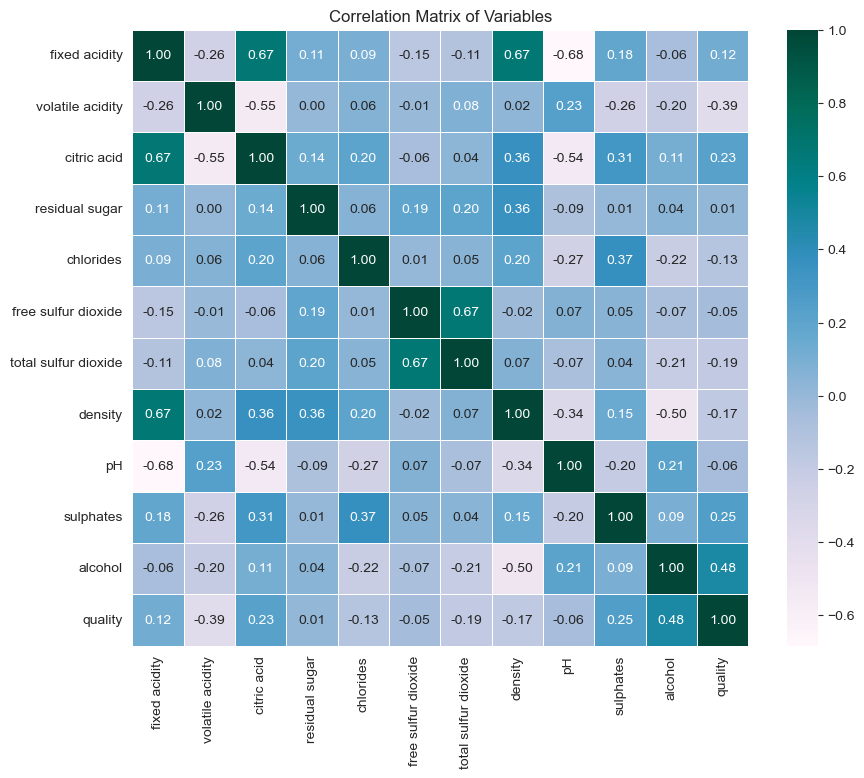

In [4]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="PuBuGn", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

На корреляционной матрице можно увидеть, что нет сильных корреляций между признаками значит нет мультиколлениарнности 

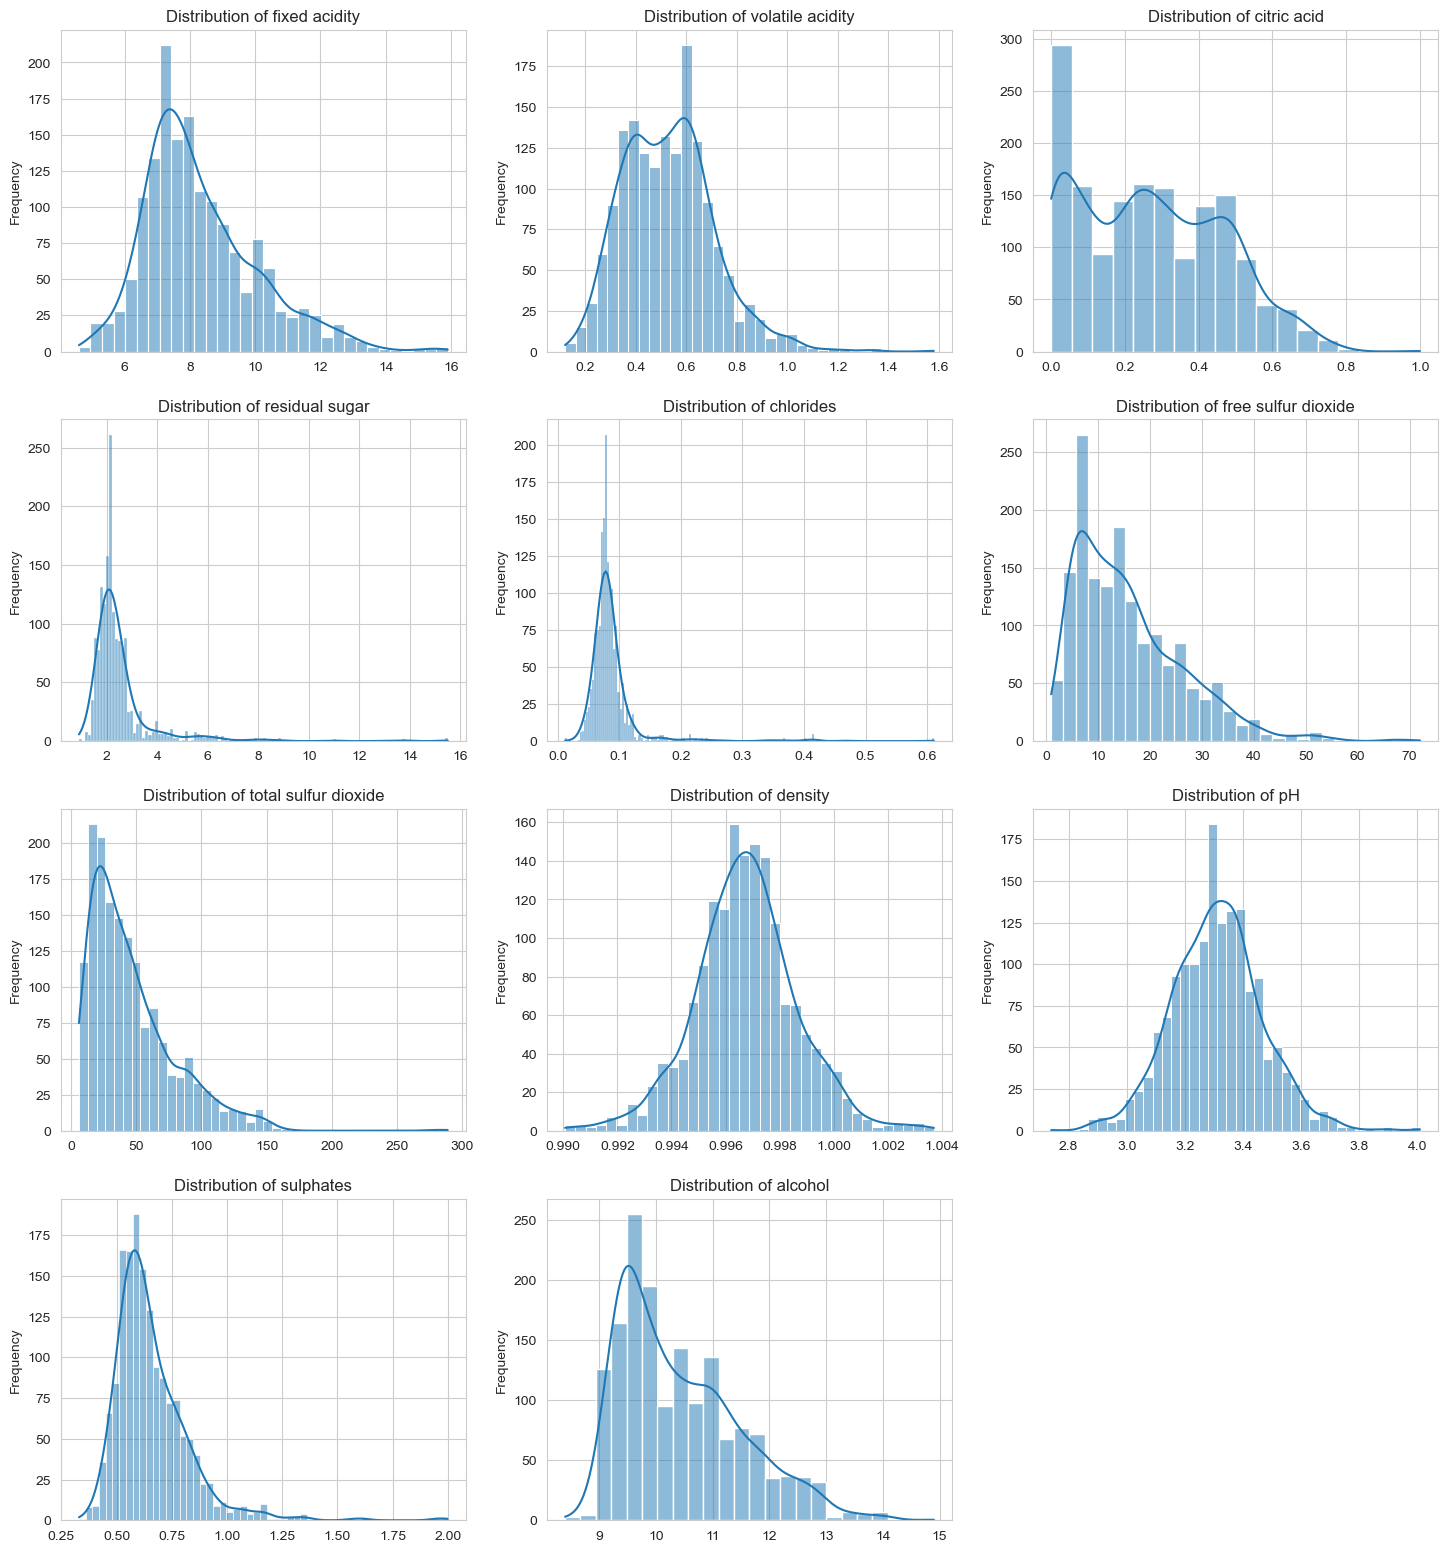

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
fig.tight_layout(pad=3.0)

columns = data.columns.drop('quality')
for i, column in enumerate(columns):
    row, col = divmod(i, 3)
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Frequency")

for j in range(len(columns), 12):
    fig.delaxes(axes[3, j - 9])

plt.show()

На графиках сверху можно заметить что нет сильных выбросов, но некоторые показывают не гауссовское распределение

2. Построение модели

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X= data.loc[:,'fixed acidity': 'alcohol']
Y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=43)
DEGREES = 1
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)
mean_squared_error = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mean_squared_error}")


Mean Squared Error: 0.3642947420576329


Ошибка достаточно приемлема для тех признаков которые мы взяли

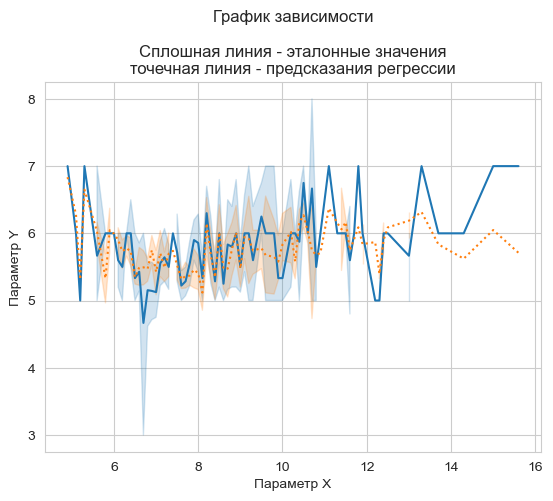

In [7]:
sns.lineplot(
    x=X_test["fixed acidity"],
    y=y_test,
    linestyle="solid"
)
sns.lineplot(
    x=X_test["fixed acidity"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()


График хоть точь-в-точь не совпадает, но повторяет оригинальный, что следует из полученной ошибки.

In [8]:
coefficients = regression['linearregression'].coef_
intercept = regression['linearregression'].intercept_
equation = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f"+ {coef:.2f} * X{i + 1} "
print("Уравнение регрессии:")
print(equation.strip())

Уравнение регрессии:
y = 16.75 + 0.00 * X1 + 0.02 * X2 + -1.21 * X3 + -0.30 * X4 + 0.01 * X5 + -1.39 * X6 + 0.00 * X7 + -0.00 * X8 + -12.83 * X9 + -0.34 * X10 + 0.87 * X11 + 0.28 * X12


Из этого набора можно получить об оценке качества вин по их составу, что может помочь улучшить процесс их производства и добиться лучшего качества.